# A look at the 82146 low resolution examples of overlapping chromosomes
This notebook is intended to load a dataset in hdf5 format and to save the images in png format (see at the end of the notebook)

In [1]:
import sys

In [4]:
import h5py
import numpy as np
from scipy.misc import imsave
from skimage import io
#print sk.__version__
#from skimage import io
from matplotlib import pyplot as plt

In [5]:
%matplotlib inline

In [6]:
from skimage import morphology as mo
#from skimage import feature
#from scipy import ndimage as nd
#from scipy import misc

## Load low resolution dataset

In [7]:
from subprocess import check_output
print(check_output(["ls", "../dataset"]).decode("utf8"))

Cy3.tif
DAPI.tif
FullRes
LowRes
LowRes_13434_overlapping_pairs.h5



In [8]:
h5f = h5py.File('../dataset/lowres_82146_overlapping_pairs_grey_DAPI-GroundTruth.h5','r')
print h5f.keys()
dsLowRes = h5f['low res overlapping chromosomes'][:]
h5f.close()

IOError: Unable to open file (Unable to open file: name = '../dataset/lowres_82146_overlapping_pairs_grey_dapi-groundtruth.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [8]:
m_byte = sys.getsizeof(dsLowRes)/1024.0/1024.0/1024
print 'Stacked images '+ str(m_byte) +' Gigabytes'
print dsLowRes.shape

Stacked images 3.30988754332 Gigabytes
(82146, 52, 52, 2)


## Just have a look at one image every 206, ~400 images:

In [9]:
sample = dsLowRes[::206,:,:,:]
sample_grey = sample[:,:,:,0]
sample_lab = sample[:,:,:,1]
print sample_grey.shape

(399, 52, 52)


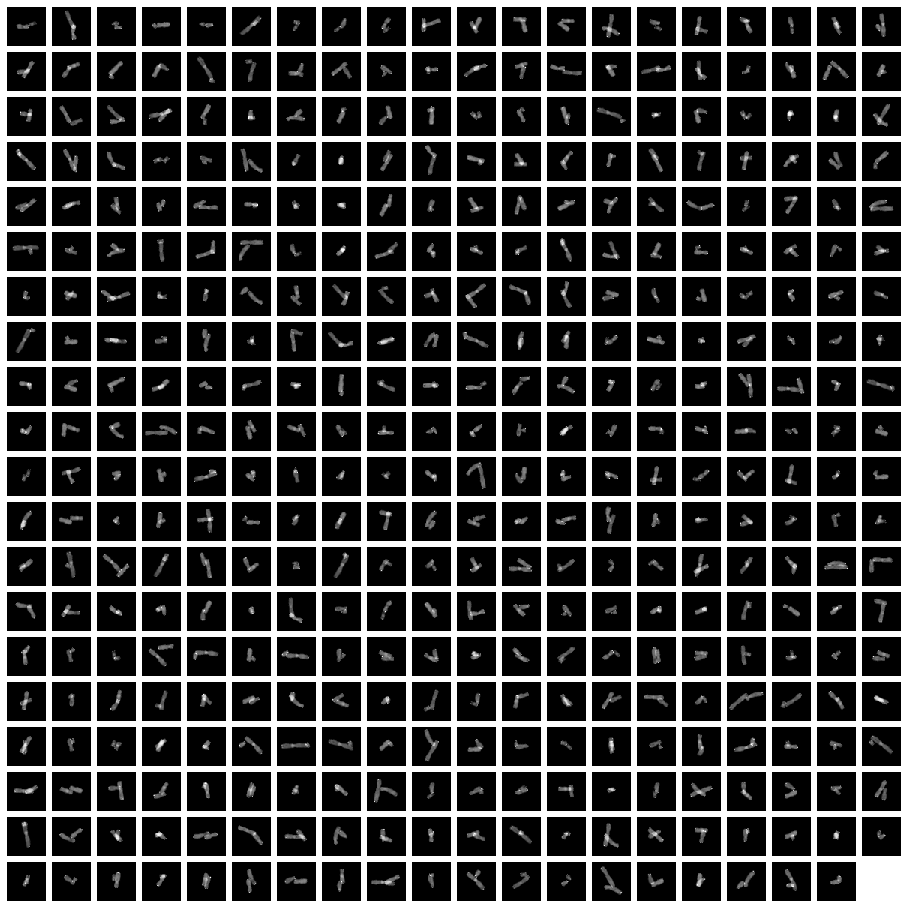

In [10]:
plt.figure(figsize=(16, 16))
for i in range(0,399):
    grey1 = sample_grey[i,:,:]
    plt.subplot(20,20,i+1, xticks=[],yticks=[])
    plt.imshow(grey1, interpolation='nearest', cmap = plt.cm.Greys_r,vmin=0, vmax=255)

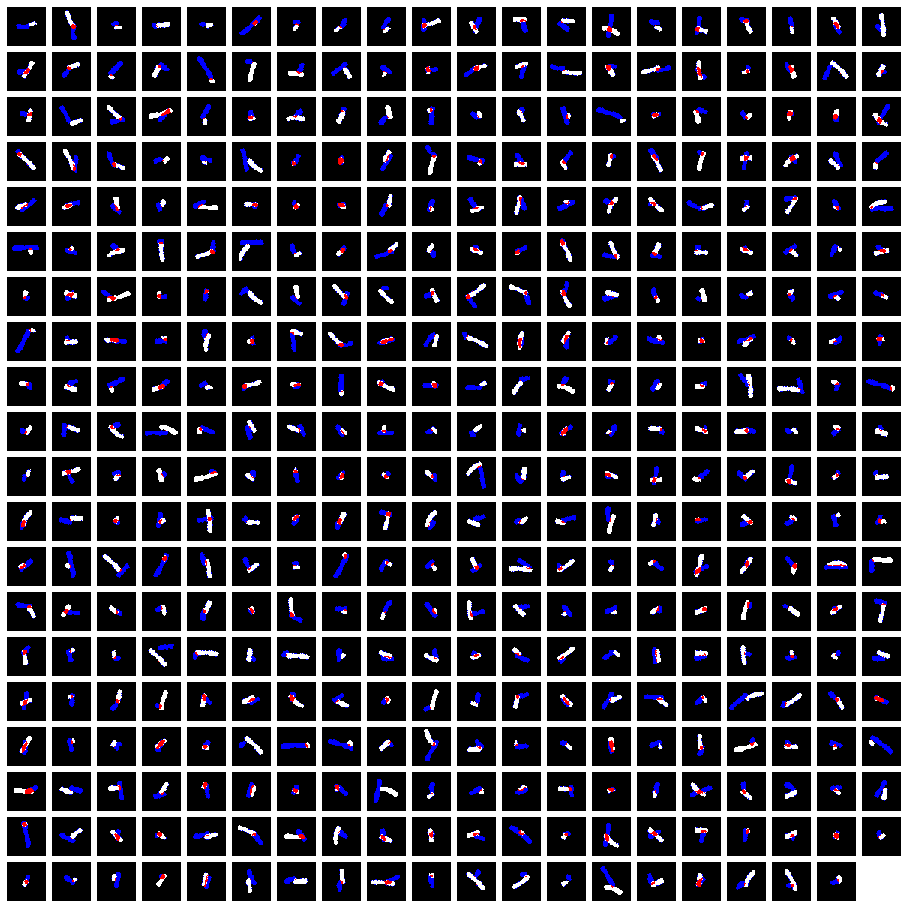

In [11]:
plt.figure(figsize=(16, 16))
for i in range(0,399):
    groundtruth = sample_lab[i,:,:]
    plt.subplot(20,20,i+1, xticks=[],yticks=[])
    plt.imshow(groundtruth, interpolation='nearest', cmap = plt.cm.flag_r)

# What is chromosomes overlapp resolution?

Choose two cases of overlapping chromosomes. The resolution of overlapping chromosomes can be performed on **DAPI**

In [11]:
easy_case = sample[13,:,:,:]
dirty_case = sample[1,:,:,:]

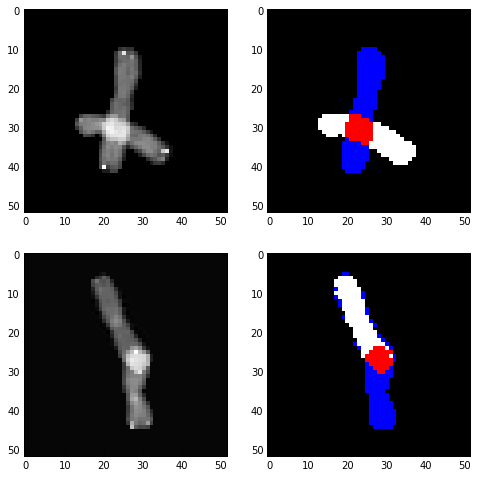

In [13]:
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.imshow(easy_case[:,:,0], interpolation = 'nearest', cmap = plt.cm.Greys_r)

plt.subplot(222)
plt.imshow(easy_case[:,:,1], interpolation = 'nearest', cmap = plt.cm.flag_r)

plt.subplot(223)
plt.imshow(dirty_case[:,:,0], interpolation = 'nearest', cmap = plt.cm.Greys_r)

plt.subplot(224)
plt.imshow(dirty_case[:,:,1], interpolation = 'nearest', cmap = plt.cm.flag_r)

### The overlapping chromosomes in the grey scaled image (mainly *DAPI*), can be isolated with the labels:
   * first chromosome : label 1
   * second chromosome: label 2
   * overlapping domain: label 3

#### First an easy case:

In [14]:
grey = easy_case[:,:,0]; print grey.shape

chrom_lab = easy_case[:,:,1]
overlap = easy_case[:,:,1]

chrom1 = chrom_lab == 1
chrom2 = chrom_lab == 2
over = overlap == 3

chrom1 = np.logical_or(chrom1, over); print chrom1.shape, chrom1.dtype
chrom2 = np.logical_or(chrom2, over)

grey1_resolved = grey * chrom1; print grey1_resolved.shape
grey2_resolved = grey * chrom2

(52, 52)
(52, 52) bool
(52, 52)


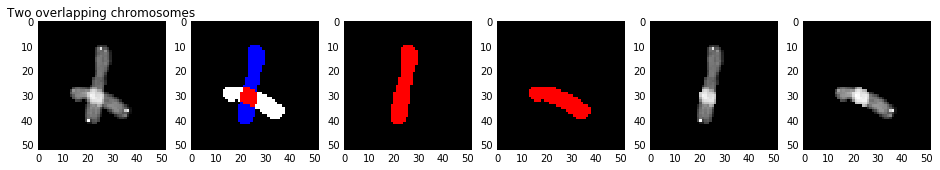

In [15]:
plt.figure(figsize=(16,16))

plt.subplot(161)
plt.title('Two overlapping chromosomes')
plt.imshow(grey, interpolation = 'nearest', cmap = plt.cm.Greys_r)

plt.subplot(162)
plt.imshow(chrom_lab, interpolation = 'nearest', cmap = plt.cm.flag_r)

plt.subplot(163)
plt.imshow(chrom1, interpolation = 'nearest', cmap = plt.cm.flag_r)

plt.subplot(164)
plt.imshow(chrom2, interpolation = 'nearest', cmap = plt.cm.flag_r)

plt.subplot(165)
plt.imshow(grey1_resolved, interpolation = 'nearest', cmap = plt.cm.Greys_r)

plt.subplot(166)
plt.imshow(grey2_resolved, interpolation = 'nearest', cmap = plt.cm.Greys_r)

## A dirty case :
In this example of overlapping chromosomes: 
* the telomeres of the two chromosomes belong to the overlapping domain.
* the labels can contain spurious pixels

In [16]:
grey = dirty_case[:,:,0];
chrom_lab = dirty_case[:,:,1]
overlap = dirty_case[:,:,1]

chrom1 = chrom_lab == 1
chrom2 = chrom_lab == 2
over = overlap == 3

chrom1 = np.logical_or(chrom1, over); print chrom1.shape, chrom1.dtype
chrom2 = np.logical_or(chrom2, over)

grey1_resolved = grey * chrom1; print grey1_resolved.shape
grey2_resolved = grey * chrom2

(52, 52) bool
(52, 52)


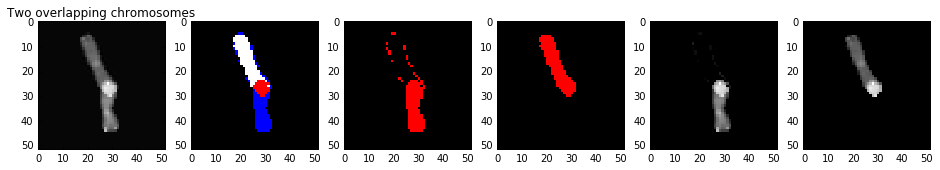

In [17]:
plt.figure(figsize=(16,16))

plt.subplot(161)
plt.title('Two overlapping chromosomes')
plt.imshow(grey, interpolation = 'nearest', cmap = plt.cm.Greys_r)

plt.subplot(162)
plt.imshow(chrom_lab, interpolation = 'nearest', cmap = plt.cm.flag_r)

plt.subplot(163)
plt.imshow(chrom1, interpolation = 'nearest', cmap = plt.cm.flag_r)

plt.subplot(164)
plt.imshow(chrom2, interpolation = 'nearest', cmap = plt.cm.flag_r)

plt.subplot(165)
plt.imshow(grey1_resolved, interpolation = 'nearest', cmap = plt.cm.Greys_r)

plt.subplot(166)
plt.imshow(grey2_resolved, interpolation = 'nearest', cmap = plt.cm.Greys_r)

## Post-process the labels

In [21]:
clean1 = mo.closing(
    mo.opening(chrom1,selem = mo.disk(2)),
    selem = mo.disk(2))

clean2 = mo.closing(
    mo.opening(chrom2,selem = mo.disk(2)),
    selem = mo.disk(2))

grey1 = grey*clean1
grey2 = grey*clean2

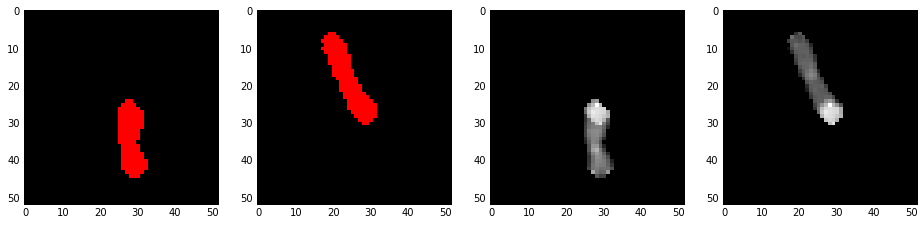

In [22]:
plt.figure(figsize=(16,16))

plt.subplot(141)
plt.imshow(clean1, interpolation = 'nearest', cmap = plt.cm.flag_r)

plt.subplot(142)
plt.imshow(clean2, interpolation = 'nearest', cmap = plt.cm.flag_r)

plt.subplot(143)
plt.imshow(grey1, interpolation = 'nearest', cmap = plt.cm.Greys_r)

plt.subplot(144)
plt.imshow(grey2, interpolation = 'nearest', cmap = plt.cm.Greys_r)

# Save the dataset on the disk:
Why? to prepare a dataset as png images for a Unet implementation in torch.According to [Qure.ai](http://blog.qure.ai/notes/ultrasound-nerve-segmentation-using-torchnet), the data must saved as:
   * Train images are in /path/to/train/data/images
   * Train masks are in /path/to/train/data/masks
   * Test images are in /path/to/test/data

In [39]:
%pwd
import os

In [42]:
%ls ..

dataset/  LICENSE  notebooks/  Raw images/  README.md


### Prepare a training / testing dataset

In [69]:
train_ds = dsLowRes[0:79999,:,:,:]
test_ds = dsLowRes[80000:,:,:,:]
print train_ds.shape
print test_ds.shape

(79999, 52, 52, 2)
(2146, 52, 52, 2)


### Make the had-hoc directories

In [48]:
print os.path.curdir
path_grey_train = os.path.join('..','images','train','grey')
path_label_train = os.path.join('..','images','train','labels')
path_grey_test = os.path.join('..','images','test','labels')

doesntExists = not(os.path.exists(os.path.join('..','dataset','images')))
if doesntExists:
    os.mkdir(os.path.join('..','dataset','images'))
    os.mkdir(os.path.join('..','dataset','images','test'))
    os.mkdir(os.path.join('..','dataset','images','train'))
    os.mkdir(os.path.join('..','dataset','images','train','labels'))
    os.mkdir(os.path.join('..','dataset','images','train','grey'))
    print 'make three top dirs'
else:
    print os.path.join('..','dataset','images')+' exists'

.
../dataset/images exists


## Save the images as png for the training dataset

In [70]:
last = train_ds.shape[0]
first = 0
for i in range(first, last):
    number = '{0:05d}'.format(i)
    #print 'ovl'+number+'.png'
    grey = train_ds[i, :, :, 0]
    label = train_ds[i, :, :, 1]
    imsave(os.path.join('..','dataset','images','train','grey','gr'+number+'.png'), grey)
    imsave(os.path.join('..','dataset','images','train','labels','lb'+number+'.png'), label)

## Make a test dataset

In [71]:
last = test_ds.shape[0]
first = 0
for i in range(first, last):
    number = '{0:05d}'.format(i)
    #print 'ovl'+number+'.png'
    grey = test_ds[i, :, :, 0]
    #label = test_ds[i, :, :, 1]
    imsave(os.path.join('..','dataset','images','test','test'+number+'.png'), grey)